# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Create settings dictionary with information
settings = {
    "units": "imperial",
    "appid": weather_api_key
}

# Empty list for data
city_data = []

# Create city record counter and sets counter
record = 1
sets = 1

# Getting data from API
print("Beginning Data Retrieval \n -----------------------------------")

for city in cities:
    try:
        city_data.append(owm.get_current(city, **settings))
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print(f"{city} not found, skipping...")
        pass
    
    # Add 1 to the record counter
    record = record + 1
    
    # Create sets and pause calls per minute
    if record == 51:
        sets = sets + 1
        record = 1
        time.sleep(60)

print("----------------------------------- \n End of Data Retrieval")


Beginning Data Retrieval 
 -----------------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | kununurra
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | patnongon
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | maragogi
Processing Record 12 of Set 1 | los llanos de aridane
Processing Record 13 of Set 1 | oranjestad
Processing Record 14 of Set 1 | innisfail
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | oxford
Processing Record 19 of Set 1 | blechepsin
Processing Record 20 of Set 1 | kiama
Processing Record 21 of Set 1 | geraldton
samusu not found, skipping...
taolanaro not found, skip

Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | makasar
Processing Record 9 of Set 5 | sekoma
Processing Record 10 of Set 5 | jacareacanga
Processing Record 11 of Set 5 | vardo
Processing Record 12 of Set 5 | kribi
Processing Record 13 of Set 5 | inhambane
Processing Record 14 of Set 5 | manaure
Processing Record 15 of Set 5 | mpongwe
Processing Record 16 of Set 5 | kaseda
Processing Record 17 of Set 5 | constitucion
Processing Record 18 of Set 5 | victor harbor
Processing Record 19 of Set 5 | yokadouma
Processing Record 20 of Set 5 | leningradskiy
Processing Record 21 of Set 5 | shache
Processing Record 22 of Set 5 | puerto ayora
Processing Record 23 of Set 5 | tasiilaq
Processing Record 24 of Set 5 | saldanha
bolungarvik not found, skipping...
Processing Record 26 of Set 5 | batsfjo

Processing Record 7 of Set 9 | nouadhibou
mys shmidta not found, skipping...
Processing Record 9 of Set 9 | tahta
Processing Record 10 of Set 9 | point fortin
Processing Record 11 of Set 9 | yaan
Processing Record 12 of Set 9 | carnarvon
Processing Record 13 of Set 9 | giyon
Processing Record 14 of Set 9 | pangkalanbuun
Processing Record 15 of Set 9 | aripuana
Processing Record 16 of Set 9 | araouane
Processing Record 17 of Set 9 | ancud
bargal not found, skipping...
Processing Record 19 of Set 9 | khandyga
Processing Record 20 of Set 9 | nelson bay
Processing Record 21 of Set 9 | hamilton
Processing Record 22 of Set 9 | elat
Processing Record 23 of Set 9 | veracruz
Processing Record 24 of Set 9 | kostrzyn
Processing Record 25 of Set 9 | gao
attawapiskat not found, skipping...
Processing Record 27 of Set 9 | boquira
Processing Record 28 of Set 9 | salinas
Processing Record 29 of Set 9 | mount isa
Processing Record 30 of Set 9 | ornskoldsvik
Processing Record 31 of Set 9 | anloga
Proces

Processing Record 10 of Set 13 | hai duong
Processing Record 11 of Set 13 | nerang
Processing Record 12 of Set 13 | noumea
Processing Record 13 of Set 13 | upata
Processing Record 14 of Set 13 | la baule-escoublac
Processing Record 15 of Set 13 | coahuayana
Processing Record 16 of Set 13 | axim
Processing Record 17 of Set 13 | azad shahr
Processing Record 18 of Set 13 | naze
Processing Record 19 of Set 13 | sokoni
Processing Record 20 of Set 13 | vostok
Processing Record 21 of Set 13 | namie
Processing Record 22 of Set 13 | oranjemund
----------------------------------- 
 End of Data Retrieval


## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create an extracts object to get variables
summary= ["name", "sys.country", "dt", "coord.lat", "coord.lon",
          "main.temp", "main.humidity", "main.temp_max",
         "clouds.all", "wind.speed"]

# Create Data Frame
data = [response(*summary) for response in city_data]
column_names = ['City', 'Country', 'Date', 'Latitude', 'Longitude',
               'Temp', 'Humidity', 'Max Temp', 'Cloudiness', 'Wind Speed']
weather_data = pd.DataFrame(data, columns=column_names)
weather_data.count()


,City,Country,Date,Latitude,Longitude,Temp,Humidity,Max Temp,Cloudiness,Wind Speed
0,Yellowknife,CA,1579738296,62.46,-114.35,5.00,84,5.00,90,10.29
1,Kununurra,AU,1579738841,-15.77,128.73,84.20,74,84.20,85,9.35
2,Chokurdakh,RU,1579738308,70.63,147.92,-20.96,97,-20.96,100,8.68
3,Patnongon,PH,1579738841,10.91,121.99,77.36,69,77.36,0,6.82
4,Jamestown,US,1579738202,42.10,-79.24,26.38,53,32.00,1,9.17
...,...,...,...,...,...,...,...,...,...,...
568,Naze,JP,1579739685,28.37,129.48,70.75,78,71.60,75,20.80
569,Sokoni,TZ,1579739685,-6.43,39.55,81.61,83,81.61,100,9.66
570,Vostok,RU,1579739685,46.49,135.88,0.12,90,0.12,43,4.18
571,Namie,JP,1579739685,37.48,141.00,39.33,93,45.00,75,2.24


In [7]:
# Output to CSV
weather_data.to_csv(output_data_file, index=False, header=True)

In [2]:
# Importing csv file -- for pick up later tasks
#weather_data = pd.read_csv(output_data_file)

,City,Country,Date,Latitude,Longitude,Temp,Humidity,Max Temp,Cloudiness,Wind Speed
0,Yellowknife,CA,1579738296,62.46,-114.35,5.00,84,5.00,90,10.29
1,Kununurra,AU,1579738841,-15.77,128.73,84.20,74,84.20,85,9.35
2,Chokurdakh,RU,1579738308,70.63,147.92,-20.96,97,-20.96,100,8.68
3,Patnongon,PH,1579738841,10.91,121.99,77.36,69,77.36,0,6.82
4,Jamestown,US,1579738202,42.10,-79.24,26.38,53,32.00,1,9.17
...,...,...,...,...,...,...,...,...,...,...
568,Naze,JP,1579739685,28.37,129.48,70.75,78,71.60,75,20.80
569,Sokoni,TZ,1579739685,-6.43,39.55,81.61,83,81.61,100,9.66
570,Vostok,RU,1579739685,46.49,135.88,0.12,90,0.12,43,4.18
571,Namie,JP,1579739685,37.48,141.00,39.33,93,45.00,75,2.24


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Temperature vs. Latitude Plot

The Temperature vs Latitude plot shows a moderate to strong relationship between temperature and latitude. This means that the maximum temperature for a city is dependent on the latitude of that city. 

There is also a bit of a curve in the data, with the top of the curve being around a latitude of 0. This is something we would expect because as we move towards the equator (0 degress latitude), the temperature would increase and as we move away from a latitude of 0, the temperature would decrease. I would expect that if a full sample of cities were plotted, it would be a normal curve.

In [7]:
# Running describe to pull the min and max of the y variable for the ylim
#weather_data["Max Temp"].describe()

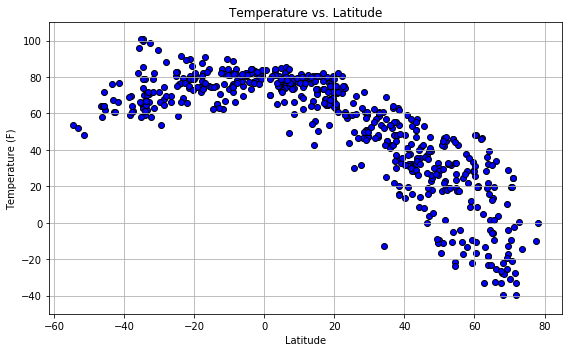

In [6]:
# Creating graph
plt.figure(figsize=(8,5))
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], facecolor="blue", edgecolor="black")

# Addint title and labels
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.ylim(-50,110)
plt.grid(True)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show

# Saving to png
plt.savefig("TempVLatitude.png")

### Humidity vs. Latitude Plot

The Humidity vs. Latitude plot is showing a weak or no relationship between humidity and latitude. This means that the percent humidity for a city is not dependent on the latitude of that city.

In [10]:
# Running describe to pull the min and max of the y variable for the ylim
#weather_data["Humidity"].describe()

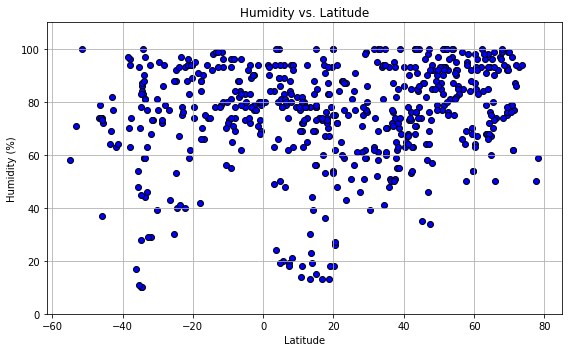

In [12]:
# Creating graph
plt.figure(figsize=(8,5))
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolor="blue", edgecolor="black")

# Addint title and labels
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(0,110)
plt.grid(True)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show

# Saving to png
plt.savefig("HumidityVLatitude.png")

### Cloudiness vs. Latitude Plot

The Cloudiness vs. latitude plot shows a weak to no relationship between cloudiness and latitude. This means that the percent of cloudiness for a city is not dependent on the latitude of that city.

In [191]:
# Running describe to pull the min and max of the y variable for the ylim
#weather_data["Cloudiness"].describe()

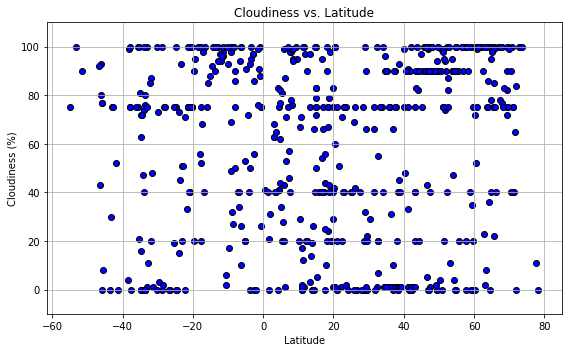

In [15]:
# Creating graph
plt.figure(figsize=(8,5))
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolor="blue", edgecolor="black")

# Addint title and labels
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.ylim(-10,110)
plt.grid(True)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show

# Saving to png
plt.savefig("CloudinessVLatitude.png")

### Wind Speed vs. Latitude Plot

The Wind Speed vs. Latitude plot is showing a weak or no relationship between wind speed and latitude. This means that wind speed within a city is not dependent on the latitude of that city.

In [18]:
# Running describe to pull the min and max of the y variable for the ylim
#weather_data["Wind Speed"].describe()

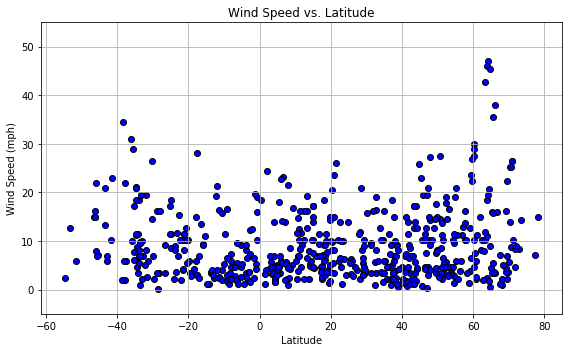

In [17]:
# Creating graph
plt.figure(figsize=(8,5))
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolor="blue", edgecolor="black")

# Addint title and labels
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.ylim(-5,55)
plt.grid(True)

# Sizing graph to frame and showing
plt.tight_layout()
plt.show

# Saving to png
plt.savefig("WindSpeedVLatitude.png")

## Linear Regression

In [193]:
# Create northern and southern identifier
weather_data["Hemisphere"] = ["Northern" if x >= 0 else "Southern" for x in weather_data["Latitude"]]

# Create new data frame for Northern Hemisphere
northern_hemi = weather_data.loc[weather_data["Hemisphere"] == "Northern"]
southern_hemi = weather_data.loc[weather_data["Hemisphere"] == "Southern"]


In [194]:
# Create a function to create Linear Regression plots
def linear_regression(x, y):
    
    # Calculate Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Create regression line
    regress = x * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot with regression line and equation
    plt.ion()
    plt.figure(figsize=(9,6))
    plt.scatter(x, y)
    plt.plot(x, regress, "r-")
    plt.annotate(f"{line} (r={round(rvalue,2)})", (10,10), xycoords='axes points', fontsize=12, color="red")
    
    print(f"The correlation coefficient is {round(rvalue,2)} (p-value = {pvalue})")
    print(f"The regression line is {line}")


In [195]:
# X Values for regression lines
x_north = northern_hemi['Latitude']
x_south = southern_hemi['Latitude']

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.86 (p-value = 2.8645221709468236e-119)
The regression line is y = -1.32x + 90.15


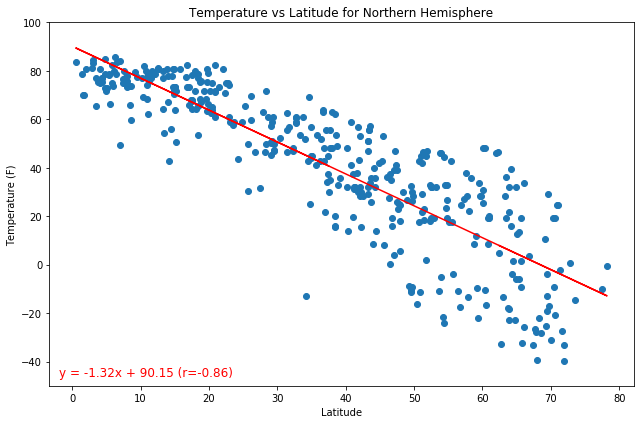

In [197]:
# Y data
y_ntemp = northern_hemi['Max Temp']

# Graph function
linear_regression(x_north, y_ntemp)

# Adjusting y-axis 
plt.ylim(-50, 100)

# Adding title and labels
plt.title("Temperature vs Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("NorthernHemisphere-TempVLatitude.png")


###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.47 (p-value = 3.482872280505785e-11)
The regression line is y = 0.34x + 82.29


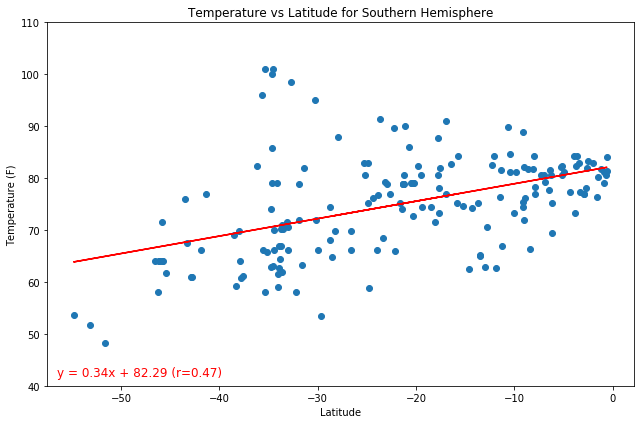

In [183]:
# Y data
y_stemp = southern_hemi['Max Temp']

# Graph function
linear_regression(x_south, y_stemp)

# Adjusting y-axis 
plt.ylim(40, 110)

# Adding title and labels
plt.title("Temperature vs Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("SouthernHemisphere-TempVLatitude.png")

#### Comparision of Temperature vs. Latitude for Northern and Southern Hemisphere
---

The temperature vs latitutde for the northern hempisphere shows a strong negative relationship. This is different from the temperature vs latitude for the sourthern hemisphere, which shows a weak positive relationship.
However, this is expected because the closer we get to a latitude of 0 (or the equator), the tempeature would increase. The sourthern hemisphere graph's latitude is increasing to 0, so it should have a positive relationship. The northern hemisphere graph's latitude is decreasing from 0, so it should have a negative relationship.


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.29 (p-value = 3.697784171081815e-09)
The regression line is y = 0.27x + 65.47


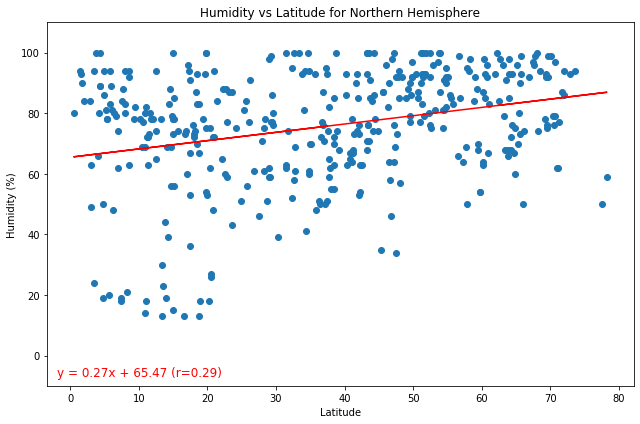

In [184]:
# Y data
y_nhumid = northern_hemi['Humidity']

# Graph function
linear_regression(x_north, y_nhumid)

# Adjusting y-axis 
plt.ylim(-10, 110)

# Adding title and labels
plt.title("Humidity vs Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("NorthernHemisphere-HumidityVLatitude.png")


###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.28 (p-value = 0.00020980197290849714)
The regression line is y = 0.38x + 83.99


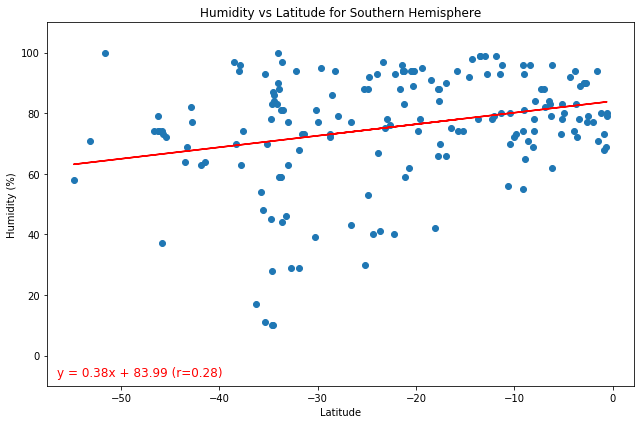

In [185]:
# Y data
y_shumid = southern_hemi['Humidity']

# Graph function
linear_regression(x_south, y_shumid)

# Adjusting y-axis 
plt.ylim(-10, 110)

# Adding title and labels
plt.title("Humidity vs Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("SourthernHemisphere-HumidityVLatitude.png")


#### Comparision of Humidity vs. Latitude for Northern and Southern Hemisphere
---
Both graphs show a very weak positive relatinship between humidity and latitude. This means that the percent humidity does not dependent on the latitude. I would not recommend a regression analysis.


###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.22 (p-value = 9.747622804586681e-06)
The regression line is y = 0.4x + 41.33


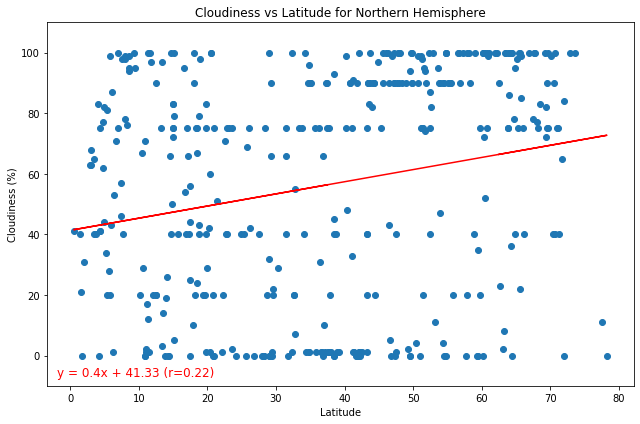

In [186]:
# Y data
y_ncloud = northern_hemi['Cloudiness']

# Graph function
linear_regression(x_north, y_ncloud)

# Adjusting y-axis 
plt.ylim(-10, 110)

# Adding title and labels
plt.title("Cloudiness vs Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("NorthernHemisphere-CloudinessVLatitude.png")


###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.2 (p-value = 0.009106455137971349)
The regression line is y = 0.53x + 71.04


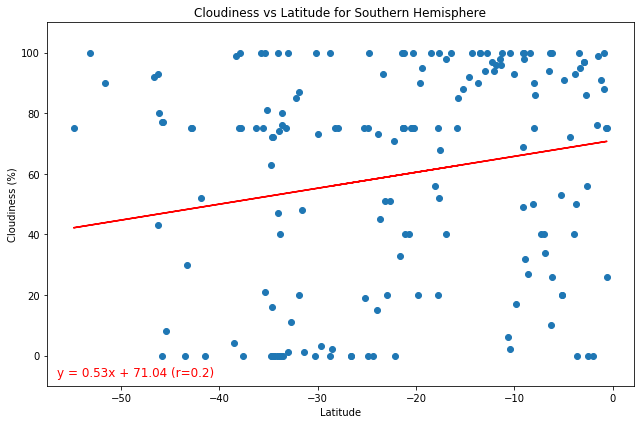

In [187]:
# Y data
y_scloud = southern_hemi['Cloudiness']

# Graph function
linear_regression(x_south, y_scloud)

# Adjusting y-axis 
plt.ylim(-10, 110)

# Adding title and labels
plt.title("Cloudiness vs Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("SourthernHemisphere-CloudinessVLatitude.png")


#### Comparision of Cloudiness vs. Latitude for Northern and Southern Hemisphere
---
Both graphs show a very weak positive relatinship between cloudiness and latitude. This means that the percent cloudiness does not dependent on the latitude. I would not recommend a regression analysis.


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.19 (p-value = 9.877395411232544e-05)
The regression line is y = 0.07x + 6.47


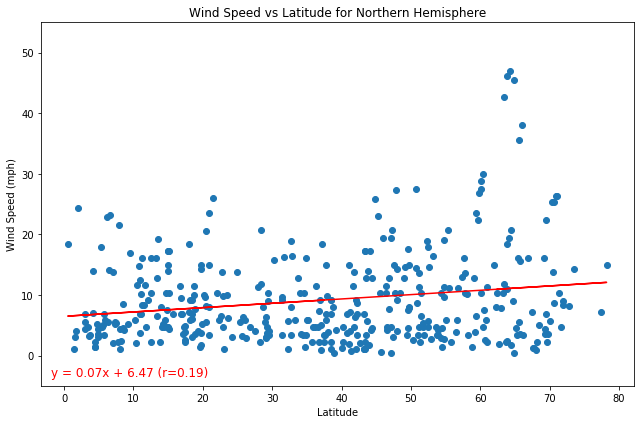

In [188]:
# Y data
y_nwind = northern_hemi['Wind Speed']

# Graph function
linear_regression(x_north, y_nwind)

# Adjusting y-axis 
plt.ylim(-5, 55)

# Adding title and labels
plt.title("Wind Speed vs Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("NorthernHemisphere-WindSpeedVLatitude.png")


###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.32 (p-value = 1.7440769513421095e-05)
The regression line is y = -0.16x + 5.44


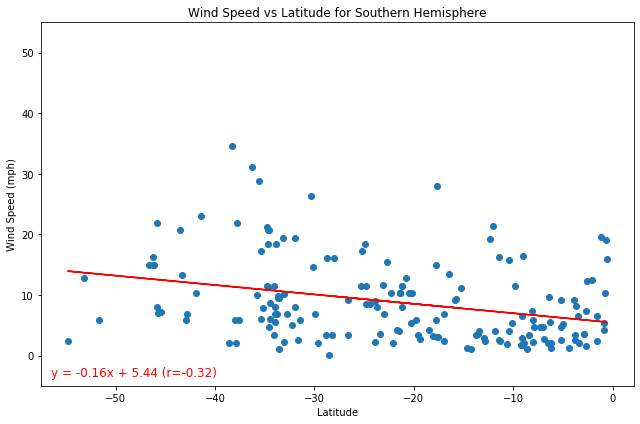

In [189]:
# Y data
y_swind = southern_hemi['Wind Speed']

# Graph function
linear_regression(x_south, y_swind)

# Adjusting y-axis 
plt.ylim(-5, 55)

# Adding title and labels
plt.title("Wind Speed vs Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Adding to frame and redraw to add edits
plt.tight_layout()
plt.draw()

# Saving to png
plt.savefig("SouthernHemisphere-WindSpeedVLatitude.png")

#### Comparision of Wind Speed vs. Latitude for Northern and Southern Hemisphere
---
The northern hemisphere data shows a positive relationship between wind speed and latitude; and the sourthern hemisphere shows a negative relationship between wind speed and latitude. This could mean that as you get closer to a latitude of 0 (or the equator), wind speed decreases. However, since the r-value shows a very weak relatinship, I would conclude that the percent humidity does not dependent on the latitude.